In [65]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy.stats import mode
import scipy as sc


In [ ]:
include = [
    
]

In [231]:
df = pd.read_csv('Customer_Dataset_File.csv',low_memory=False,sep=',')

## EDA

In [232]:
df.head(5)

,CustomerID,RandID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,1395460,1,2,Female,20,15,Professional,Yes,0,...,Yes,Yes,Yes,No,13,No,Yes,Yes,No,No
1,0648-AIPJSP-UVM,5892126,5,5,Male,22,17,Sales,No,0,...,No,Yes,No,Yes,18,Yes,Yes,Yes,Yes,Yes
2,5195-TLUDJE-HVO,3924533,3,4,Female,67,14,Sales,No,16,...,No,No,No,No,21,No,No,No,No,Yes
3,4459-VLPQUH-3OL,2941342,4,3,Male,23,16,Sales,No,0,...,No,No,No,Yes,26,Yes,Yes,Yes,No,Yes
4,8158-SMTQFB-CNO,3444746,2,2,Male,26,16,Sales,No,1,...,Yes,Yes,Yes,No,27,Yes,No,Yes,No,No


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           5000 non-null   object 
 1   RandID               5000 non-null   int64  
 2   Region               5000 non-null   int64  
 3   TownSize             5000 non-null   object 
 4   Gender               4967 non-null   object 
 5   Age                  5000 non-null   int64  
 6   EducationYears       5000 non-null   int64  
 7   JobCategory          4985 non-null   object 
 8   UnionMember          5000 non-null   object 
 9   EmploymentLength     5000 non-null   int64  
 10  Retired              5000 non-null   object 
 11  HHIncome             5000 non-null   object 
 12  DebtToIncomeRatio    5000 non-null   float64
 13  CreditDebt           5000 non-null   float64
 14  OtherDebt            5000 non-null   float64
 15  LoanDefault          5000 non-null   o

In [234]:
df.columns

Index(['CustomerID', 'RandID', 'Region', 'TownSize', 'Gender', 'Age',
       'EducationYears', 'JobCategory', 'UnionMember', 'EmploymentLength',
       'Retired', 'HHIncome', 'DebtToIncomeRatio', 'CreditDebt', 'OtherDebt',
       'LoanDefault', 'MaritalStatus', 'HouseholdSize', 'NumberPets',
       'NumberCats', 'NumberDogs', 'NumberBirds', 'HomeOwner', 'CarsOwned',
       'CarOwnership', 'CarBrand', 'CarValue', 'CommuteTime',
       'PoliticalPartyMem', 'Votes', 'CreditCard', 'CardTenure',
       'CardItemsMonthly', 'CardSpendMonth', 'ActiveLifestyle',
       'PhoneCoTenure', 'VoiceLastMonth', 'VoiceOverTenure', 'EquipmentRental',
       'EquipmentLastMonth', 'EquipmentOverTenure', 'CallingCard',
       'WirelessData', 'DataLastMonth', 'DataOverTenure', 'Multiline', 'VM',
       'Pager', 'Internet', 'CallerID', 'CallWait', 'CallForward',
       'ThreeWayCalling', 'EBilling', 'TVWatchingHours', 'OwnsPC',
       'OwnsMobileDevice', 'OwnsGameSystem', 'OwnsFax', 'NewsSubscriber'],
      d

In [235]:
df.isnull().sum()

CustomerID              0
RandID                  0
Region                  0
TownSize                0
Gender                 33
Age                     0
EducationYears          0
JobCategory            15
UnionMember             0
EmploymentLength        0
Retired                 0
HHIncome                0
DebtToIncomeRatio       0
CreditDebt              0
OtherDebt               0
LoanDefault             0
MaritalStatus           0
HouseholdSize           8
NumberPets              6
NumberCats              7
NumberDogs              8
NumberBirds            34
HomeOwner              13
CarsOwned               0
CarOwnership            0
CarBrand                0
CarValue                0
CommuteTime             0
PoliticalPartyMem       0
Votes                   0
CreditCard              0
CardTenure              0
CardItemsMonthly        0
CardSpendMonth          0
ActiveLifestyle         0
PhoneCoTenure           0
VoiceLastMonth          0
VoiceOverTenure         0
EquipmentRen

In [236]:
#Checking customer data types
df.dtypes

CustomerID              object
RandID                   int64
Region                   int64
TownSize                object
Gender                  object
Age                      int64
EducationYears           int64
JobCategory             object
UnionMember             object
EmploymentLength         int64
Retired                 object
HHIncome                object
DebtToIncomeRatio      float64
CreditDebt             float64
OtherDebt              float64
LoanDefault             object
MaritalStatus           object
HouseholdSize          float64
NumberPets             float64
NumberCats             float64
NumberDogs             float64
NumberBirds            float64
HomeOwner              float64
CarsOwned                int64
CarOwnership            object
CarBrand                object
CarValue                object
CommuteTime             object
PoliticalPartyMem       object
Votes                   object
CreditCard              object
CardTenure               int64
CardItem

In [237]:
#Dimensions of the data and investigate if there are any duplicate rows
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the customer dataframe')

There are 5000 rows and 60 columns in the customer dataframe


In [238]:
df.head()

,CustomerID,RandID,Region,TownSize,Gender,Age,EducationYears,JobCategory,UnionMember,EmploymentLength,...,CallWait,CallForward,ThreeWayCalling,EBilling,TVWatchingHours,OwnsPC,OwnsMobileDevice,OwnsGameSystem,OwnsFax,NewsSubscriber
0,3964-QJWTRG-NPN,1395460,1,2,Female,20,15,Professional,Yes,0,...,Yes,Yes,Yes,No,13,No,Yes,Yes,No,No
1,0648-AIPJSP-UVM,5892126,5,5,Male,22,17,Sales,No,0,...,No,Yes,No,Yes,18,Yes,Yes,Yes,Yes,Yes
2,5195-TLUDJE-HVO,3924533,3,4,Female,67,14,Sales,No,16,...,No,No,No,No,21,No,No,No,No,Yes
3,4459-VLPQUH-3OL,2941342,4,3,Male,23,16,Sales,No,0,...,No,No,No,Yes,26,Yes,Yes,Yes,No,Yes
4,8158-SMTQFB-CNO,3444746,2,2,Male,26,16,Sales,No,1,...,Yes,Yes,Yes,No,27,Yes,No,Yes,No,No


In [239]:
#Rows containing duplicate data
duplicates = df[df.duplicated()]
print('number of duplicate rows:', duplicates.shape)
print(f'There are {len(duplicates)} number of duplicate rows')
duplicates.shape

number of duplicate rows: (0, 60)
There are 0 number of duplicate rows


(0, 60)

In [240]:
df.count() 

CustomerID             5000
RandID                 5000
Region                 5000
TownSize               5000
Gender                 4967
Age                    5000
EducationYears         5000
JobCategory            4985
UnionMember            5000
EmploymentLength       5000
Retired                5000
HHIncome               5000
DebtToIncomeRatio      5000
CreditDebt             5000
OtherDebt              5000
LoanDefault            5000
MaritalStatus          5000
HouseholdSize          4992
NumberPets             4994
NumberCats             4993
NumberDogs             4992
NumberBirds            4966
HomeOwner              4987
CarsOwned              5000
CarOwnership           5000
CarBrand               5000
CarValue               5000
CommuteTime            5000
PoliticalPartyMem      5000
Votes                  5000
CreditCard             5000
CardTenure             5000
CardItemsMonthly       5000
CardSpendMonth         5000
ActiveLifestyle        5000
PhoneCoTenure       

In [241]:
# Finding the null values for each column
print(df.isnull().sum())

CustomerID              0
RandID                  0
Region                  0
TownSize                0
Gender                 33
Age                     0
EducationYears          0
JobCategory            15
UnionMember             0
EmploymentLength        0
Retired                 0
HHIncome                0
DebtToIncomeRatio       0
CreditDebt              0
OtherDebt               0
LoanDefault             0
MaritalStatus           0
HouseholdSize           8
NumberPets              6
NumberCats              7
NumberDogs              8
NumberBirds            34
HomeOwner              13
CarsOwned               0
CarOwnership            0
CarBrand                0
CarValue                0
CommuteTime             0
PoliticalPartyMem       0
Votes                   0
CreditCard              0
CardTenure              0
CardItemsMonthly        0
CardSpendMonth          0
ActiveLifestyle         0
PhoneCoTenure           0
VoiceLastMonth          0
VoiceOverTenure         0
EquipmentRen

In [242]:
# Droping the nulls 
df = df.dropna()

In [243]:
# Checking the shape of the resultant DataFrame
df.shape

(4893, 60)

In [244]:
def num_missing(x):
  return sum(x.isnull())
#Applying per column:
print(df.apply(num_missing, axis=0))

CustomerID             0
RandID                 0
Region                 0
TownSize               0
Gender                 0
Age                    0
EducationYears         0
JobCategory            0
UnionMember            0
EmploymentLength       0
Retired                0
HHIncome               0
DebtToIncomeRatio      0
CreditDebt             0
OtherDebt              0
LoanDefault            0
MaritalStatus          0
HouseholdSize          0
NumberPets             0
NumberCats             0
NumberDogs             0
NumberBirds            0
HomeOwner              0
CarsOwned              0
CarOwnership           0
CarBrand               0
CarValue               0
CommuteTime            0
PoliticalPartyMem      0
Votes                  0
CreditCard             0
CardTenure             0
CardItemsMonthly       0
CardSpendMonth         0
ActiveLifestyle        0
PhoneCoTenure          0
VoiceLastMonth         0
VoiceOverTenure        0
EquipmentRental        0
EquipmentLastMonth     0


<AxesSubplot:xlabel='Age'>

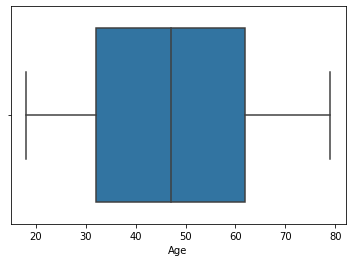

In [245]:
sns.boxplot(x = df['Age'])

<AxesSubplot:xlabel='EducationYears'>

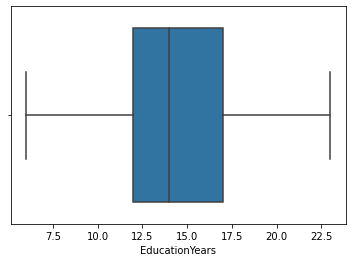

In [246]:
sns.boxplot(x = df['EducationYears'])

<AxesSubplot:xlabel='EmploymentLength'>

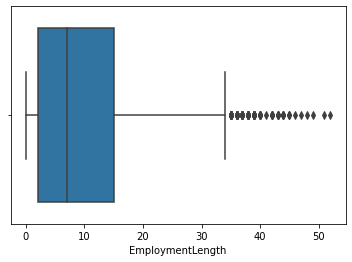

In [247]:
sns.boxplot(x = df['EmploymentLength'])

In [248]:
#Calculate summary statistics
summary = df.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
RandID,4893.0,3.254249e+06,1.596072e+06,501256.0,1876420.0,3251795.0,4661433.0,5998310.0
Region,4893.0,3.000613e+00,1.420919e+00,1.0,2.0,3.0,4.0,5.0
Age,4893.0,4.708420e+01,1.777200e+01,18.0,32.0,47.0,62.0,79.0
EducationYears,4893.0,1.455324e+01,3.282719e+00,6.0,12.0,14.0,17.0,23.0
EmploymentLength,4893.0,9.772123e+00,9.703546e+00,0.0,2.0,7.0,15.0,52.0


# Data Preprocessing 

In [249]:
# Converting the values in columns into float and removing '$' from them 
#Custom create function to clean variables with currency symbols
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('-','0').replace('$', '').replace(',', ''))
    return(x)

In [250]:
#CarValue
df['CarValue']=pd.to_numeric(df['CarValue'].apply(clean_currency),errors='coerce')

In [251]:
#CardSpendMonth
df['CardSpendMonth']=pd.to_numeric(df['CardSpendMonth'].apply(clean_currency),errors='coerce')

In [252]:
#VoiceLastMonth
df['VoiceLastMonth']=pd.to_numeric(df['VoiceLastMonth'].apply(clean_currency),errors='coerce')

In [253]:
#VoiceOverTenure
df['VoiceOverTenure']=pd.to_numeric(df['VoiceOverTenure'].apply(clean_currency),errors='coerce')

In [254]:
#EquipmentLastMonth
df['EquipmentLastMonth']=pd.to_numeric(df['EquipmentLastMonth'].apply(clean_currency),errors='coerce')

In [255]:
#EquipmentOverTenure
df['EquipmentOverTenure']=pd.to_numeric(df['EquipmentOverTenure'].apply(clean_currency),errors='coerce')

In [256]:
#DataLastMonth
df['DataLastMonth']=pd.to_numeric(df['DataLastMonth'].apply(clean_currency),errors='coerce')

In [257]:
#DataOverTenure
df['DataOverTenure']=pd.to_numeric(df['DataOverTenure'].apply(clean_currency),errors='coerce')

In [258]:
#Replace missing character values with the mode of the distribution 
df['HouseholdSize'].fillna(mode(df['HouseholdSize']).mode[0], inplace=True)  
df['NumberBirds'].fillna(mode(df['NumberBirds']).mode[0], inplace=True)  
#Replacing missing values in Carvalue by mean 
df['CarValue'].fillna(df['CarValue'].mean(), inplace=True)  


In [259]:
# Check the null values 
df.isnull().sum()

CustomerID             0
RandID                 0
Region                 0
TownSize               0
Gender                 0
Age                    0
EducationYears         0
JobCategory            0
UnionMember            0
EmploymentLength       0
Retired                0
HHIncome               0
DebtToIncomeRatio      0
CreditDebt             0
OtherDebt              0
LoanDefault            0
MaritalStatus          0
HouseholdSize          0
NumberPets             0
NumberCats             0
NumberDogs             0
NumberBirds            0
HomeOwner              0
CarsOwned              0
CarOwnership           0
CarBrand               0
CarValue               0
CommuteTime            0
PoliticalPartyMem      0
Votes                  0
CreditCard             0
CardTenure             0
CardItemsMonthly       0
CardSpendMonth         0
ActiveLifestyle        0
PhoneCoTenure          0
VoiceLastMonth         0
VoiceOverTenure        3
EquipmentRental        0
EquipmentLastMonth     0


In [260]:
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [261]:
df['HHIncome'].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
4995    <class 'str'>
4996    <class 'str'>
4997    <class 'str'>
4998    <class 'str'>
4999    <class 'str'>
Name: HHIncome, Length: 4893, dtype: object

In [262]:
#Binning continuous variables
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]
  print(break_points)  
  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(1,len(cut_points)+2)
  print(labels)
  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [263]:
#Binning DebtToIncomeRatio:
cut_points = [5,10,15]

#To get labels that start from 0 modify above range function; To use labels add labels in binning function below
df["DebtToIncomeRatio_Recoded"] = binning(df["DebtToIncomeRatio"], cut_points)
print (pd.value_counts(df["DebtToIncomeRatio_Recoded"], sort=False))

[0.0, 5, 10, 15, 43.1]
range(1, 5)
1    1194
2    1629
3    1156
4     914
Name: DebtToIncomeRatio_Recoded, dtype: int64


In [264]:
#Binning Age:
cut_points = [31,47,62]
labels = ["18-31",">31-47",">47-62",">62"]
df["Age_Recoded"] = binning(df["Age"], cut_points,labels)
print (pd.value_counts(df["Age_Recoded"], sort=False))

[18, 31, 47, 62, 79]
['18-31', '>31-47', '>47-62', '>62']
18-31     1223
>31-47    1287
>47-62    1170
>62       1213
Name: Age_Recoded, dtype: int64


In [265]:
df.PhoneCoTenure.describe()

count    4893.000000
mean       38.218680
std        22.657552
min         0.000000
25%        18.000000
50%        38.000000
75%        59.000000
max        72.000000
Name: PhoneCoTenure, dtype: float64

In [266]:
#Binning PhoneCoTenure:
cut_points = [18,38,59]
labels = ["0-18",">18-38",">38-59",">59"]
df["PhoneCoTenure_Coded"] = binning(df['PhoneCoTenure'], cut_points,labels)
print (pd.value_counts(df['PhoneCoTenure_Coded'], sort=False))

[0, 18, 38, 59, 72]
['0-18', '>18-38', '>38-59', '>59']
0-18      1273
>18-38    1190
>38-59    1215
>59       1215
Name: PhoneCoTenure_Coded, dtype: int64


In [267]:
df['JobCategory'].value_counts()

Sales           1599
Professional    1357
Labor            671
Service          610
Crafts           446
Agriculture      210
Name: JobCategory, dtype: int64

In [268]:
#Creating pivot tables; Higher levels of DebtToIncomeRatio for Yes to LoanDefault
LoanDefault_Grps = df.pivot_table(values=["DebtToIncomeRatio"], index=['Gender','LoanDefault','Age_Recoded'], aggfunc=np.mean)
print (LoanDefault_Grps)

                                DebtToIncomeRatio
Gender LoanDefault Age_Recoded                   
Female No          18-31                 7.668269
                   >31-47                8.529412
                   >47-62                9.283077
                   >62                   9.314638
       Yes         18-31                12.155769
                   >31-47               13.905031
                   >47-62               18.230556
                   >62                  16.920690
Male   No          18-31                 7.437785
                   >31-47                8.221712
                   >47-62                9.088957
                   >62                  10.135154
       Yes         18-31                11.431507
                   >31-47               13.865385
                   >47-62               15.282022
                   >62                  18.703226


In [269]:
#Coding a nominal variable into a numeric variable
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
  

In [270]:
#Coding LoanStatus as Y=1, N=0:
print ('Before Coding:')
print (pd.value_counts(df['OwnsMobileDevice']))
df['OwnsMobileDevice_Coded'] = coding(df['OwnsMobileDevice'], {'No':1,'Yes':2})
print ('\nAfter Coding:')
print (pd.value_counts(df['OwnsMobileDevice_Coded']))

Before Coding:
No     2550
Yes    2343
Name: OwnsMobileDevice, dtype: int64

After Coding:
1    2550
2    2343
Name: OwnsMobileDevice_Coded, dtype: int64


In [271]:
df_columns = df.columns.values.tolist()
df_columns

['CustomerID',
 'RandID',
 'Region',
 'TownSize',
 'Gender',
 'Age',
 'EducationYears',
 'JobCategory',
 'UnionMember',
 'EmploymentLength',
 'Retired',
 'HHIncome',
 'DebtToIncomeRatio',
 'CreditDebt',
 'OtherDebt',
 'LoanDefault',
 'MaritalStatus',
 'HouseholdSize',
 'NumberPets',
 'NumberCats',
 'NumberDogs',
 'NumberBirds',
 'HomeOwner',
 'CarsOwned',
 'CarOwnership',
 'CarBrand',
 'CarValue',
 'CommuteTime',
 'PoliticalPartyMem',
 'Votes',
 'CreditCard',
 'CardTenure',
 'CardItemsMonthly',
 'CardSpendMonth',
 'ActiveLifestyle',
 'PhoneCoTenure',
 'VoiceLastMonth',
 'VoiceOverTenure',
 'EquipmentRental',
 'EquipmentLastMonth',
 'EquipmentOverTenure',
 'CallingCard',
 'WirelessData',
 'DataLastMonth',
 'DataOverTenure',
 'Multiline',
 'VM',
 'Pager',
 'Internet',
 'CallerID',
 'CallWait',
 'CallForward',
 'ThreeWayCalling',
 'EBilling',
 'TVWatchingHours',
 'OwnsPC',
 'OwnsMobileDevice',
 'OwnsGameSystem',
 'OwnsFax',
 'NewsSubscriber',
 'DebtToIncomeRatio_Recoded',
 'Age_Recoded',


In [272]:
print (pd.value_counts(df['HomeOwner']))

1.0    3087
0.0    1806
Name: HomeOwner, dtype: int64


In [273]:
df['HomeOwner2'] = df['HomeOwner'] + 1

In [274]:
print (pd.value_counts(df['HomeOwner2']))

2.0    3087
1.0    1806
Name: HomeOwner2, dtype: int64


In [275]:
df['VoiceLastMonth_Coded'] = df['VoiceLastMonth'].apply(clean_currency).astype('float')

# Label Encoding 


In [276]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

In [286]:
df['CarsOwned']=df['CarsOwned'].replace(['-1'],'No Car')
df['CarBrand']=df['CarBrand'].replace(['-1'],'No Brand')
df['Internet'] = df['Internet'].replace(['2','3','4'],'No Status')

In [287]:
#gender
df['Gender'] = Encoder.fit_transform(df['Gender'])
#JobCategory
df['JobCategory'] = Encoder.fit_transform(df['JobCategory'])
#UnionMember
df['UnionMember'] = Encoder.fit_transform(df['UnionMember'])
#Retired
df['Retired'] = Encoder.fit_transform(df['Retired'])
#LoanDefault
df['LoanDefault'] = Encoder.fit_transform(df['LoanDefault'])
#MaritalStatus
df['MaritalStatus'] = Encoder.fit_transform(df['MaritalStatus'])
#CarBrand
df['CarBrand']=Encoder.fit_transform(df['CarBrand'])
#CarsOwned
df['CarsOwned']=Encoder.fit_transform(df['CarsOwned'])
#PoliticalPartyMem
df['PoliticalPartyMem']=Encoder.fit_transform(df['PoliticalPartyMem'])
#Votes
df['Votes']=Encoder.fit_transform(df['Votes'])
#CreditCard
df['CreditCard']=Encoder.fit_transform(df['CreditCard'])
#ActiveLifestyle
df['ActiveLifestyle']=Encoder.fit_transform(df['ActiveLifestyle'])
#EquipmentRental
df['EquipmentRental']=Encoder.fit_transform(df['EquipmentRental'])
#CallingCard
df['CallingCard']=Encoder.fit_transform(df['CallingCard'])
#WirelessData
df['WirelessData']=Encoder.fit_transform(df['WirelessData'])
#Multiline
df['Multiline']=Encoder.fit_transform(df['Multiline'])
#VM
df['VM']=Encoder.fit_transform(df['VM'])
#Pager
df['Pager']=Encoder.fit_transform(df['Pager'])
#Internet
df['Internet']=Encoder.fit_transform(df['Internet'])
#CallerID
df['CallerID']=Encoder.fit_transform(df['CallerID'])
#CallWait
df['CallWait']=Encoder.fit_transform(df['CallWait'])
#CallForward
df['CallForward']=Encoder.fit_transform(df['CallForward'])
#ThreeWayCalling
df['ThreeWayCalling']=Encoder.fit_transform(df['ThreeWayCalling'])
#EBilling

df['EBilling']=Encoder.fit_transform(df['EBilling'])
#OwnsPC
df['OwnsPC']=Encoder.fit_transform(df['OwnsPC'])
#OwnsMobileDevice
df['OwnsMobileDevice']=Encoder.fit_transform(df['OwnsMobileDevice'])
#OwnsGameSystem
df['OwnsGameSystem']=Encoder.fit_transform(df['OwnsGameSystem'])
#OwnsFax
df['OwnsFax']=Encoder.fit_transform(df['OwnsFax'])
#NewsSubscriber
df['NewsSubscriber']=Encoder.fit_transform(df['NewsSubscriber'])



In [289]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cust_kmeans_scaled = scaler.fit_transform(df.drop(columns=['CustomerID']))
#Assign the scaled data to a DataFrame using the index keyword arguments
cust_kmeans_scaled_df = pd.DataFrame(cust_kmeans_scaled, index = df.index)
cust_kmeans_scaled_df.head()

ValueError: could not convert string to float: '#NULL!'

In [ ]:
# Plot inertia for multiple cluster solutions against the number of clusters
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(2,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df.drop(columns=['CustomerId']))
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
cust_df_frame = pd.DataFrame({'Cluster':range(2,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(cust_df_frame['Cluster'], cust_df_frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')